# Week 1

## Overview
As explained in the [Before week 1: How to take this class](https://nbviewer.org/github/suneman/socialdata2024/blob/main/lectures/How_To_Take_This_Class.ipynb) notebook, each week of this class is an Jupyter notebook like this one. **_In order to successfully follow the class, you simply start reading from the top_**, following the instructions. As you read, you will encounter three things that should cause you to take a break from reading or sometimes leave the page for a little bit:

* Instructions to **check out a video lecture**.
* Instructions to **read something** (I don't use a single textbook, so will make sure to link to the relevant text).
* Instructions to **solve a few exercises**. Ideally you should solve the exercises on your own, but work on and discuss the problems as part of a 3 person group. Exercises should be carried out within a Jupyter notebook (explained below). The exercises are the most important part of the class. It is through the exercises that you will learn the course material, and because the exercises lay the foundations for the two mandatory course assignment (due after week 4 and week 8). 

**Hint**: And you can ask us for help at any point if you get stuck!

## Today

This first lecture will go over a few different topics to get you started 

* First, I'll explain a little bit about what we'll be doing this year (hint, you may want to watch _Minority Report_ if you want to prepare deeply for the class 😊).
* Second, we'll start by loading some real-world data into your very own computers and getting started with some data analysis.

## Part 1: Predictive policing. A case to learn from

For a number of years I've been a little bit obsessed with [predictive policing](https://www.sciencemag.org/news/2016/09/can-predictive-policing-prevent-crime-it-happens). I guess there are various reasons. For example:

* I think it's an interesting application of data science (not necesarily a good one, see notes on "dark sides" below). 
* It connects to popular culture in a big way. Both through TV shows, such as [NUMB3RS](https://en.wikipedia.org/wiki/Numbers_(TV_series)) (it also features in Bones ... or any of the CSI), and also any number of movies, my favorite of which has to be [Minority report](https://www.imdb.com/title/tt0181689/).
* Predictive policing is also big business. Companies like [PredPol](https://www.predpol.com), [Palantir](https://www.theverge.com/2018/2/27/17054740/palantir-predictive-policing-tool-new-orleans-nopd), and many other companies offer their services law enforcement by analyzing crime data. 
* It hints at the dark sides of Data Science. In these algorithms, concepts like [bias, fairness, and accountability](https://www.smithsonianmag.com/innovation/artificial-intelligence-is-now-used-predict-crime-is-it-biased-180968337/) become incredibly important when the potential outcome of an algorithm is real people going to prison.  
* And, finally there's lots of data available!! Chicago, NYC, and San Francisco all have crime data available freely online.

Below is a little video to pique your interest. 

[![A link to the video](http://img.youtube.com/vi/YxvyeaL7NEM/0.jpg)](http://www.youtube.com/watch?v=YxvyeaL7NEM "The video")

All this is to say that in the coming weeks, we'll be working to understand crime in San Francisco. We'll be using the SF crime data as a basis for our work on data analysis and data visualization. 

We will draw on data from the project [SF OpenData](https://data.sfgov.org), looking into SFPD incidents which have been recorded back since January 2003.

*Reading*

Read [this article](https://www.sciencemag.org/news/2016/09/can-predictive-policing-prevent-crime-it-happens) from science magazine to get a bit deeper sense of the topic.


> *Exercise*
> 
> Answer the following questions in your own words
> 
> * According to the article, is predictive policing better than best practice techniques for law enforcement? The article is from 2016. Take a look around the web, does this still seem to be the case in 2024? (hint, when you evaluate the evidence consider the source)
> * List and explain some of the possible issues with predictive policing according to the article. 

# Part 2: Load some crime-data into your Jupyter notebook

The data we will be working with is perfect for `pandas`, so a good approach is to go to [Python Bootcamp](https://nbviewer.org/github/suneman/socialdata2024/blob/main/lectures/PythonBootcamp.ipynb) lecture if you don't and figure out how to load data into `pandas' means. 

But this course is not about programming orthdoxy, so if you don't like `pandas`, you're free to use other solutions. There are many other ways to load data into Python, e.g. using dictionaries.

> *Exercise 1*
>
> * Go to https://datasf.org/opendata/
> * Click on "Public Safety"
> * You will notice that the SF crime data is divided into two periods. One from 2003 to May 2018 and one which is all of 2018 to the present. **Today, to keep things easy, we will just work with the data from 2003 to 2018** (from January 1st 2003 to December 31st 2017 to be exact). 
> * Thus, you may simply download all police incidence reports, historical 2003 to may 2018. You can get everything as a big CSV file if you press the *Export* button (it's a snappy little ~500MB file).
> * To get this thing into `pandas`, you can use the tips and tricks described [here](https://www.shanelynn.ie/python-pandas-read_csv-load-data-from-csv-files/). If you want to try your luck without `pandas`, you can use the `csv` package to load the file.
> * Now generate the following simple statistics
>   - Report the total number of crimes in the dataset.
>   - List the various categories of crime. How many are there? 
>   - List the number of crimes in each category.

In [113]:
# import libraries
import pandas as pd

# load the file
data = pd.read_csv("../files/Police_Department_Incident_Reports__Historical_2003_to_May_2018_20240130.csv")

# filter the time range
# data = data[data["Date"] <= '12-31-2017']

# add year column
data["Date"] = pd.to_datetime(data["Date"])
data["Year"] = data["Date"].dt.year

data = data[data["Year"] != 2018]

In [115]:
# calculate statistics
no_crimes = data["PdId"].count()
cat_crimes = data["Category"].unique()
no_cat_crimes = len(cat_crimes)
no_crimes_in_cat = data.groupby("Category").size().sort_values(ascending=False)

In [116]:
# print statistics
print(f"There are a total of {no_crimes} crimes in the dataset.")
print(f"There are {no_cat_crimes} crime categories and they are listed here alongside with the number of crimes in each category:")
print(no_crimes_in_cat)

There are a total of 2084466 crimes in the dataset.
There are 37 crime categories and they are listed here alongside with the number of crimes in each category:
Category
LARCENY/THEFT                  464365
OTHER OFFENSES                 296411
NON-CRIMINAL                   231689
ASSAULT                        163158
VEHICLE THEFT                  124759
DRUG/NARCOTIC                  116352
VANDALISM                      111933
WARRANTS                        98234
BURGLARY                        88971
SUSPICIOUS OCC                  77392
ROBBERY                         53417
MISSING PERSON                  43297
FRAUD                           40540
FORGERY/COUNTERFEITING          22800
SECONDARY CODES                 21905
WEAPON LAWS                     20397
TRESPASS                        18681
PROSTITUTION                    16453
STOLEN PROPERTY                 11193
DISORDERLY CONDUCT               9838
DRUNKENNESS                      9676
RECOVERED VEHICLE               

---

In order to do awesome *predictive policing* later on in the class, we're going to dissect the SF crime-data quite thoroughly to figure out what has been going on over the last  years on the San Francisco crime scene. 

> *Exercise 2*: The types of crimes. The first field we'll dig into is the column "Category".
> * We have already counted the number of crimes in each category. What is the most commonly occurring category of crime? What is the least frequently occurring?
> * Create a bar-plot over crime occurrences. This is a data visualization class, so here is the first essential lesson: **For a plot to be informative you need to label the axes** (The police chief will be furious if you forget). It can also be nice to other relevant pieces of info, title, labels, etc.). Mine looks like this (but yours doesn't have to look exactly like mine - the important thing is that you clearly communicate the information in the dataset).

<div>
<img src="https://raw.githubusercontent.com/suneman/socialdata2022/main/files/CrimeOccurrencesByCategory.png" width="700"/>
</div>

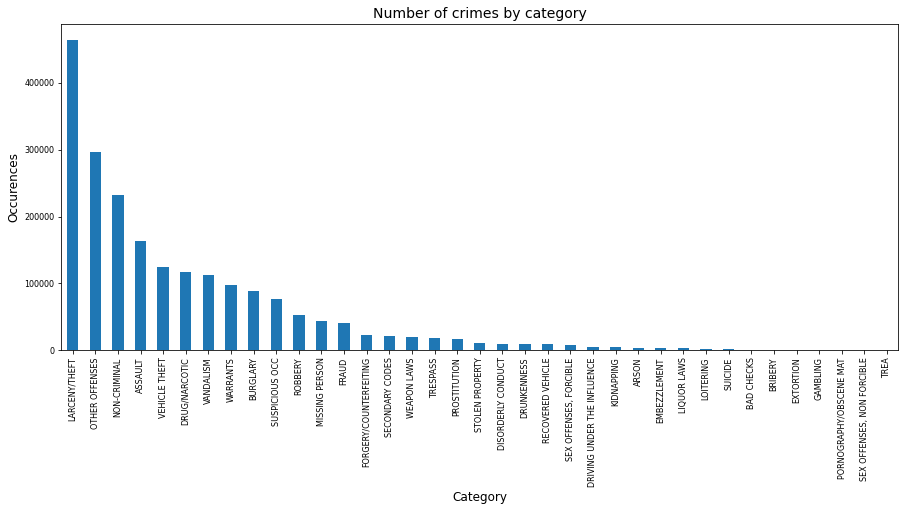

The most occuring crime is larceny/theft and the least occuring crime is trea.


In [117]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 6))
no_crimes_in_cat.plot(kind='bar', fontsize=8)

ax.set_xlabel('Category', fontsize=12)
ax.set_ylabel('Occurences', fontsize=12)
ax.set_title('Number of crimes by category', fontsize=14)

plt.xticks(rotation=90)
plt.show()

print("The most occuring crime is larceny/theft and the least occuring crime is trea.")

The plot above already gives us a bit of information but does not tell us anything about how crimes changed over the years. Let's have a look at it!

> *Exercise 3*: Temporal patterns.
> * To start off easily, let's count the number of crimes per year:
>     * What is the year with most crimes? 
>     * What is the year with the fewest crimes? (**hint** if your result is 2018, go back and see what I wrote about the date range up in exercise 1).
> * Create a barplot of crimes-per-year (years on the $x$-axis, crime-counts on the $y$-axis).
> * Finally, Police chief Suneman is interested in the temporal development of only a **subset of categories, the so-called *focus crimes***. Those categories are listed below (for convenient copy-paste action). Create bar-charts displaying the year-by-year development of each of these categories across the years 2003-2017.
> 

Most crimes were comitted in 2015 and fewest crimes were comitted in 2011


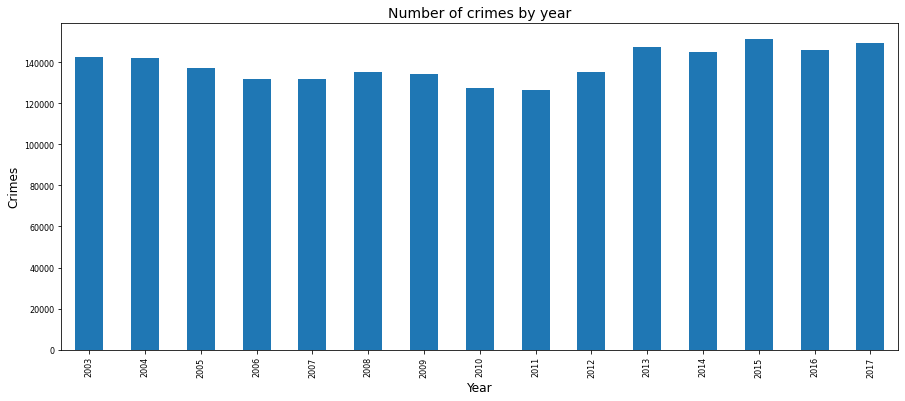

In [129]:
# groupby year
yearly_crimes = data.groupby("Year").size()
print(f"Most crimes were comitted in {yearly_crimes.idxmax()} and fewest crimes were comitted in {yearly_crimes.idxmin()}")

# make plot
fig, ax = plt.subplots(figsize=(15, 6))
yearly_crimes.plot(kind='bar', fontsize=8)

ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Crimes', fontsize=12)
ax.set_title('Number of crimes by year', fontsize=14)

plt.xticks(rotation=90)
plt.show()

In [130]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

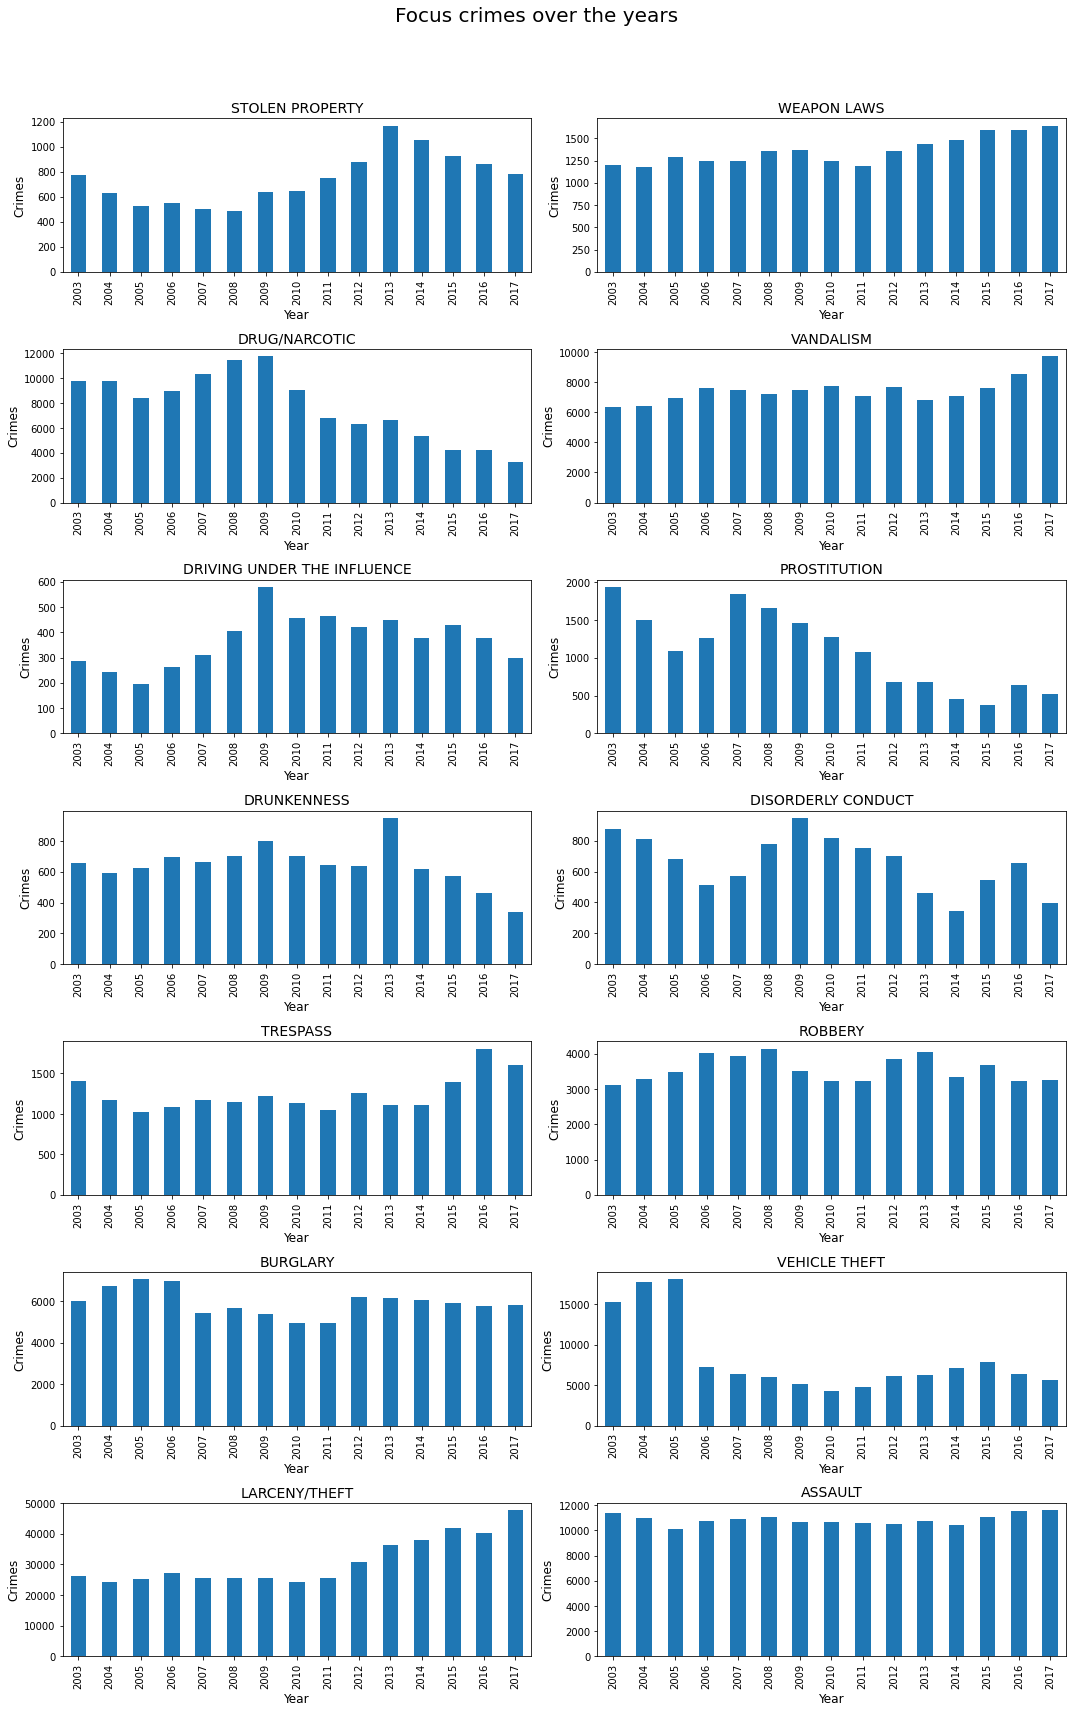

In [154]:
# filter data to only contain focuscrimes and groupby
data_focus = data[data["Category"].isin(focuscrimes)]
yearly_cat_crimes = data_focus.groupby(["Year","Category"]).size()


# Get unique categories
categories = list(focuscrimes)

# Calculate the total number of subplots
total_subplots = len(categories)

# Create subplots with specified layout
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(15, 25))

# Flatten the 2D array of subplots for easier indexing
axes = axes.flatten()

# Plot each category in a separate subplot
for i in range(total_subplots):
    if i < total_subplots:
        ax = axes[i]
        category = categories[i]
        data_focus[data_focus['Category'] == category].groupby('Year').size().plot(kind='bar', ax=ax)
        ax.set_ylabel('Crimes', fontsize=12)
        ax.set_xlabel('Year', fontsize=12)
        ax.set_title(f'{category}', fontsize=14)

# Adjust layout and show the plot
plt.suptitle("Focus crimes over the years",fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

My plot looks like this for the 14 focus crimes:

  ![Barplots](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/CrimesYearCategory.png)
    
Note that names of each plot explain what you're looking at. And that when you have many subplots it's OK that you don't label every single axis. You may simply put axes on the bottom / side that are common for all plots.) 

**What I want you to notice is that by "drilling into" the data, exploring by category patterns begin to emerge**. The overall crime-counts don't tell us much, but as we interrogate the data, we start to learn about what's going on. We will continue this exploration next week.

> *Exercise 3 (continued)*
> * Comment on at least three interesting trends in your plot. 
>    
> Also, here's a fun fact: The drop in car thefts is due to new technology called 'engine immobilizer systems' - get the full story [here](https://www.nytimes.com/2014/08/12/upshot/heres-why-stealing-cars-went-out-of-fashion.html). 

You've made it! You have successfully completed Lecture 1. If you didn't get enough, try to **personalize** your plots. We have already added titles, labels, etc., however, the look of default pandas plots is quite boring (that blue... and font... 😂). 